# Day 14 Pre-Class Assignment: Making Predictions Using Data


## Goals for today's assignment

* Describe the utility of fitting trendlines to data, in the context of making predictions about the future
* Use best-fit lines to make predictions about future values
* Quantitatively and qualitatively describe how to determine the Goodness of fit for a given line

## 1. Predicting Future Trends

Consider the following dataset showing salinity of water versus depth for an imaginary body of water:



<br/>
<img src="https://raw.githubusercontent.com/msu-cmse-courses/cmse201-S22-data/main/Day-15/Fancy_Plot_Salinity.jpg" alt="Curve-fitting" width=700px/>

&#9989;&nbsp; **1.1** What would you guess the salinity would be at a depth of 6 meters? At 7 meters?  What makes you think those would be the values?

<font size=+3>&#9998;</font> I think it would be a salinity of 15 at a depth of 6 meters and a salinity of 16.5 at a depth of 7 meters. I'm getting these values by following the trendline of the pre-existsing data points.

&#9989;&nbsp; **1.2** Make a line connecting the *first* and *last* points and continue it out to a depth of 7 meters. Using the line, predict what the salinity would be at a depth of 6 and 7 meters.

<font size=+3>&#9998;</font> For a depth of 6 meters I found a salinity of 14 and for a depth of 7 meters I found a salinity of 16. 


&#9989;&nbsp; **1.3** How do the values you determined using your line compare with the values you predicted in 1.1?

<font size=+3>&#9998;</font> The values are slightly lower than those that I predicted in 1.1.


## 2. Determining the Line of Best Fit 

Consider the figure below, which shows the same data set, but with two lines. 


<br/>
<img src="https://raw.githubusercontent.com/msu-cmse-courses/cmse201-S22-data/main/Day-15/Fancy_Plot_Salinity_Fake_Lines.jpg" alt="Curve-fitting" width=700px/>

&#9989;&nbsp; **2.1** Without doing any calculations (i.e., just looking at the figure), do you think the salinity at a depths of 6 and 7 meters will be closer to values in line 1 or line 2? What is it about that particular line that makes you think it will be more accurate in predicting future values?

<font size=+3>&#9998;</font> I think it will be closer with Line 1 since Line 1 follows the trendline more closely. 


&#9989;&nbsp; **2.2** Imagine someone asks you to show *quantitatively* that the line you have selected will be more accurate in predicting future values. What is a way you could quantitatively measure how well a line fits some dataset?

Come up with an algorithm--that is, a detailed procedure, like a recipe--for calculating how well a line fits a dataset.

<font size=+3>&#9998;</font> I would use the formula for finding the r-squared value for a linear regression model: 

R^2 = 1 / ((n-1)(1-R^2))/(n-(k+1))

where n = sample size,
k = the number of IV

&#9989;&nbsp; **2.3** Apply your algorithm to the lines and data and lines in the previous figure. Does the line you choose in part 2.1 fit the data the best according to your algorithm? The data values and the values for the two lines are provided.

In [1]:
import numpy as np

x_data = np.array([0,1,2,3,4,5])
y_data = np.array([0.5,2.6,3.2,7.7,8.2,11.9])
y_values_line_1 = np.array([2.2, 4.15, 6.1, 8.05, 10., 11.95, 13.9, 15.85])
y_values_line_2 = np.array([5., 6.6, 8.2, 9.8, 11.4, 13., 14.6, 16.2])

<font size=+3>&#9998;</font> *im not gonna lie, im not sure on how to use the linear regression model to this data without doing at least a half hour worth of calculations. i also cant think of any other model that we could use to apply to this problem.


## 3. Using a Computer to Fit a Line 

There’s a tool in the Python package SciPy called `curve_fit` that we can use to fit a mathematical function to data. We’ll be using this extensively in class, so it’s important that you get an idea of how it works.

**Note:** By fitting a function, we mean there are parameters that we can adjust to find the values that best fit the data. 

To use `curve_fit`, you need a minimum of two things:
- A (Python) function that contains the mathematical function you are fitting to your data
- A dataset, consisting of x and y values, that you are fitting your mathematical function to.

Let’s look at an example. 

Below is a set of *x* and *y* values, and we want to fit the following function:

$$y = A \sin(Bx + C)$$

&#9989;&nbsp; **3.1** What parameters are we fitting in this function? 

<font size=+3>&#9998;</font> These parameteres we are fitting to are the function that will contain the y function as well as the dataset that will be inmported into the function.


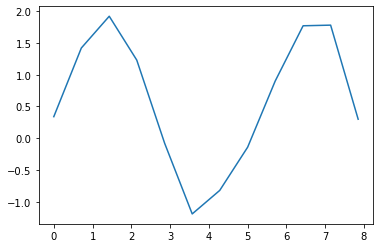

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([0.00, 0.71, 1.43, 2.14, 2.86, 3.57, 4.28, 5.00, 5.71, 6.43, 7.14, 7.85])
y = np.array([0.34, 1.42, 1.92, 1.23, -0.08, -1.19, -0.82, -0.14, 0.90, 1.77, 1.78, 0.30])

plt.plot(x,y)

First, we define a Python function that contains the mathematical function we’re fitting.

In [3]:
def sin_function(x, A, B, C):
    return A * np.sin(B * x + C)

We now have the two pieces needed to use `curve_fit`, so let’s run it and see what we get.

In [4]:
from scipy.optimize import curve_fit

best_fit_parameters, just_ignore_this = curve_fit(sin_function, x, y)
print(best_fit_parameters)

[1.64659542 1.17088966 0.0770739 ]


From this calling function, we get two values: `popt` and `pcov`. `popt` contains the best fit parameters. **You do not need to worry about `pcov`**.  

If we want to see what our best fit line looks like, we use the following expression:

In [5]:
A_expected = best_fit_parameters[0]  
B_expected = best_fit_parameters[1]
C_expected = best_fit_parameters[2]

y_expected = sin_function(x, A_expected, B_expected, C_expected)

&#9989;&nbsp; **3.2** Give a brief explanation for what the previous line of code is doing.

<font size=+3>&#9998;</font> The previous line of code is taking of the outputs fom the best_fit_parameters and plotting them as their own line.


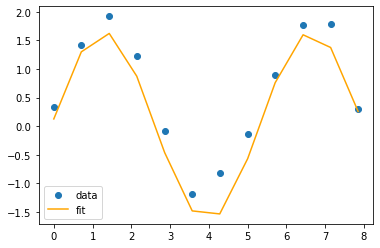

In [6]:
plt.scatter(x, y, label = "data")
plt.plot(x, y_expected, color = "orange", label = "fit")
plt.legend()

### YOUR TURN

One of the simplest functions you can have is a straight line, which takes the form:

$$y = A x + B$$

&#9989;&nbsp; **3.3** What parameters would we fit in this function? 

<font size=+3>&#9998;</font> we need to have the function, the x values, and the y values


&#9989;&nbsp; **3.4** Fit a straight line to the x and y dataset provided below. Specify what the best fit parameters are and make a plot showing your best fit line.

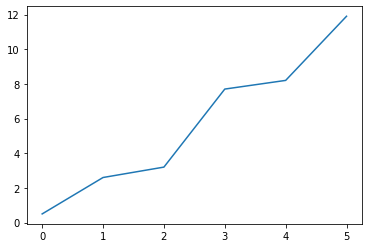

In [7]:
x = np.array([0,1,2,3,4,5])
y = np.array([0.5,2.6,3.2,7.7,8.2,11.9])

#Put your code here
plt.plot(x,y)

def line_function(x, A, B):
    return A * x + B

[2.23714286 0.09047619]


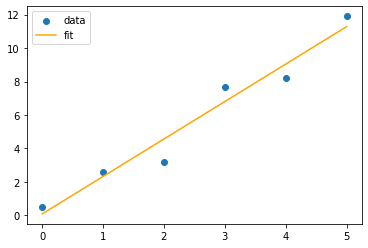

In [9]:
from scipy.optimize import curve_fit

best_fit_parameters, just_ignore_this = curve_fit(line_function, x, y)
print(best_fit_parameters)

A_expected = best_fit_parameters[0]  
B_expected = best_fit_parameters[1]

y_expected = line_function(x, A_expected, B_expected)

plt.scatter(x, y, label = "data")
plt.plot(x, y_expected, color = "orange", label = "fit")
plt.legend()

## 4. Determining Goodness of Fit

&#9989;&nbsp; **4.1** Compare your best fit line to the line provided in Section 2. Which one appears to fit the data better? 

<font size=+3>&#9998;</font> I believe that the line of best fit created with the scipy module fits the data better.


&#9989;&nbsp; **4.2** Try to turn the algorithm you described in part 2.2 for measuring how well a line fits the data into code and apply it to your best fit line. How does this value for goodness of fit compare to the one you found in part 2.3?  

In [ ]:
#Put your code here

R^2 = 1 / ((n-1)*(1-R^2))/(n-(k+1))

<font size=+3>&#9998;</font> I'm not sure how to apply this algorithm to the problem and I can't think of any other method that I could use to compare the values of the best of fit lines unfortunately.


---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [10]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

See you in class!

Copyright &#169; 2021, [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu/) at Michigan State University, All rights reserved.